# Линейно-квадратичный регулятор

Рассмотрим линейную стационарную систему дифференциальных уравнений 

$$  \dot{ \mathbf{x}} = \mathbf{A} \mathbf{x} + \mathbf{B}\mathbf{u}, \quad \mathbf{x} \in \mathbb{R}^n , \quad \mathbf{u} \in \mathbb{R}^m$$
где 
$\mathbf{A}_{n \times n}$, $\mathbf{B}_{n\times m}$ - матрицы с постоянными коэффициентами  
$\mathbf{x}$  - вектор состояния  
$\mathbf{u}$ - вектор управляющих параметров 
   

Цель: найти управление $\mathbf{u}(t)$, минимизирующее следующий функционал  

$$ J = \frac{1}{2}\int_{0}^{\infty} \mathbf{x}^T(t) \mathbf{Q} \mathbf{x}(t) + \mathbf{u}(t)^T \mathbf{R} \mathbf{u}(t) dt $$  
где 
$\mathbf{Q}, \mathbf{R}$ - положительно определенные матрицы 

In [1]:
import numpy as np
import scipy as sci
from scipy.integrate import solve_ivp 
import matplotlib.pyplot as plt

In [2]:
# решение алгебраического уравнения Риккати
def lqr_fun(A, B, Q, R):
    P = np.matrix(sci.linalg.solve_continuous_are(A, B, Q, R))
 
    K = -np.matrix(sci.linalg.inv(R) * (B.T * P))
 
    eigVals, eigVecs = sci.linalg.eig(A - B * K)
 
    return K, P, eigVals

## Пример: двойной интегратор

K = [[-1.         -1.73205081]]
S = [[1.73205081 1.        ]
 [1.         1.73205081]]
eigvals = [-0.45685025+0.j  2.18890106+0.j]


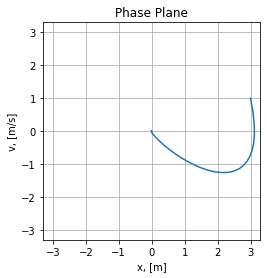

In [3]:
A = np.array([[0, 1], [0, 0]])
B = np.array([[0], [1]])
Q = np.array([[1, 0], [0, 1]])
R = np.eye(1)

K, P, eigvals = lqr_fun(A, B, Q, R)

print("K = " + str(K))
print("S = " + str(P))
print("eigvals = " + str(eigvals))

def rhs_double_integrator(t, x):
    return np.array(A.dot(x) + (B.dot(K)).dot(x))[0]
    
x0 = [3, 1]

t_sol = np.arange(0, 20, 0.1)
sol = solve_ivp(rhs_double_integrator, (0, 20), x0, t_eval = t_sol)
x = sol.y.T

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x[:, 0], x[:, 1])
ax.grid(True)
plim = np.max(np.abs(x0))
ax.set_xlim([-1.1 * plim, 1.1 * plim])
ax.set_ylim([-1.1 * plim, 1.1 * plim])
ax.set_title('Phase Plane')
ax.set_ylabel(r'v, [m/s]')
ax.set_xlabel(r'x, [m]')
ax.set_aspect('equal')

## Уравнение Риккати и оптимальный закон управления

Введем $\mathbf{p}$ - вектор сопряженных переменных 
$$ \mathbf{H}(\mathbf{x},\mathbf{p},\mathbf{u},t) = \mathbf{p}^T \cdot \mathbf{f} $$
$$ (  f : \dot{\mathbf{ x}} = \mathbf{f}(\mathbf{x},\mathbf{u}, t)  ) $$  

$$  \dot {\mathbf{x}} = \mathbf{A  x + B u} $$  
$$  \dot{\mathbf{ y}} = \frac{1}{2}\left(\mathbf{x}^T(t) \mathbf{Q} \mathbf{x} + \mathbf{u}(t)^T \mathbf{R}\mathbf{ u}(t) \right) $$  

Воспользуемся приемом, который позволяет свести задачу с интегральным функционалом к задаче с терминальным функционалом. Обозначим подынтегральное выражение через $\dot{y}$ и будем решать задачу $y \rightarrow$  min 

$$  \dot {\mathbf{x}} = \frac{\partial H(\mathbf{x}, \mathbf{p}, \mathbf{u}, t)}{\partial p} $$
$$  \dot {\mathbf{p}} = - \frac{\partial H(\mathbf{x}, \mathbf{p}, \mathbf{u}, t)}{\partial x} $$

$$ H(\mathbf{x}, \mathbf{p}, \mathbf{u}, t) = \mathbf{p}^T \cdot \mathbf{f} = \mathbf{p}^T \mathbf{A} \mathbf{x} + \mathbf{p}^T  \mathbf{B}  \mathbf{u} + \frac{1}{2}\left(\mathbf{x}^T(t) \mathbf{Q} \mathbf{x} + \mathbf{u}^T(t) \mathbf{R} \mathbf{u}(t)\right) $$
$$ \frac{\partial H(\mathbf{x}, \mathbf{p}, \mathbf{u}, t)}{\partial \mathbf{u}}  = 0 \quad\Rightarrow \quad \mathbf{ B^T p + Ru} = 0 $$

Отсюда получаем выражение для $\mathbf{u}$
$$ \mathbf{u} = \mathbf{-R}^{-1}\mathbf{B}^T\mathbf{p} $$

Система кононических уравнений для переменных $\mathbf{x}$ и $\mathbf{p}$:

$$
\begin{equation}\label{eq:dotX}\tag{1}
\dot{\mathbf{ x}} = \mathbf{A} \mathbf{x} - \mathbf{B}\mathbf{ R}^{-1}\mathbf{B}^T\mathbf{p} 
\end{equation}
$$
$$ \mathbf{x(0)} = \mathbf{x}_o $$

$$ 
\begin{equation}\label{eq:dotP}\tag{2}
\dot{\mathbf{ p}} = -\mathbf{A}^T\mathbf{p} - \mathbf{Qx} 
\end{equation}
$$
$$ \mathbf{p(T) = 0} $$

Ищем решение в виде $ \mathbf{p = P \cdot x} $, где $\mathbf{P}$ - некоторая матрица

подставим в уравнение $\eqref{eq:dotP}$ 
$$ \mathbf{P} \dot{\mathbf{ x}} + \dot{\mathbf{ P}} \mathbf{x} = -\mathbf{A}^T\mathbf{P}\mathbf {x} - \mathbf{Q x} $$

и заменим $\dot{\mathbf{x}}$ правой частью уравнения $\eqref{eq:dotX}$
$$ \mathbf{PAx - PB R^{-1}B^TPx + \dot P x} = \mathbf{-A^T P x - Qx} $$

Таким образом, мы получили дифференциальное матричное уравнение Риккати 
$$ \dot{\mathbf{P}} + \mathbf{A}^T \mathbf{P} + \mathbf{PA} - \mathbf{PBR}^{-1}\mathbf{B}^T\mathbf{P} + \mathbf{Q} = 0, \quad \mathbf{P}(T) = 0 $$

Следовательно, для нахождения искомого управления $\mathbf{u}(t)$ следует: 

1) Найти $\mathbf{P}$ из уравнения Риккати   
2) Выразить $ \mathbf{u} $ через $ \mathbf{x} $
$$ \mathbf{u} = -\mathbf{R}^{-1}\mathbf{B}^T \mathbf{P}(t)\mathbf{x}(t) = - \mathbf{K x}(t) $$

# Уравнения относительного движения КА

Рассматривается движение КА по круговой орбите в центральном гравитационном поле Земли. Уравнения движения КА, летящего по близкой орбите могут быть получены линеаризацией его полных уравнений движения в орбитальной системе координат, связанной с движением первого КА. 

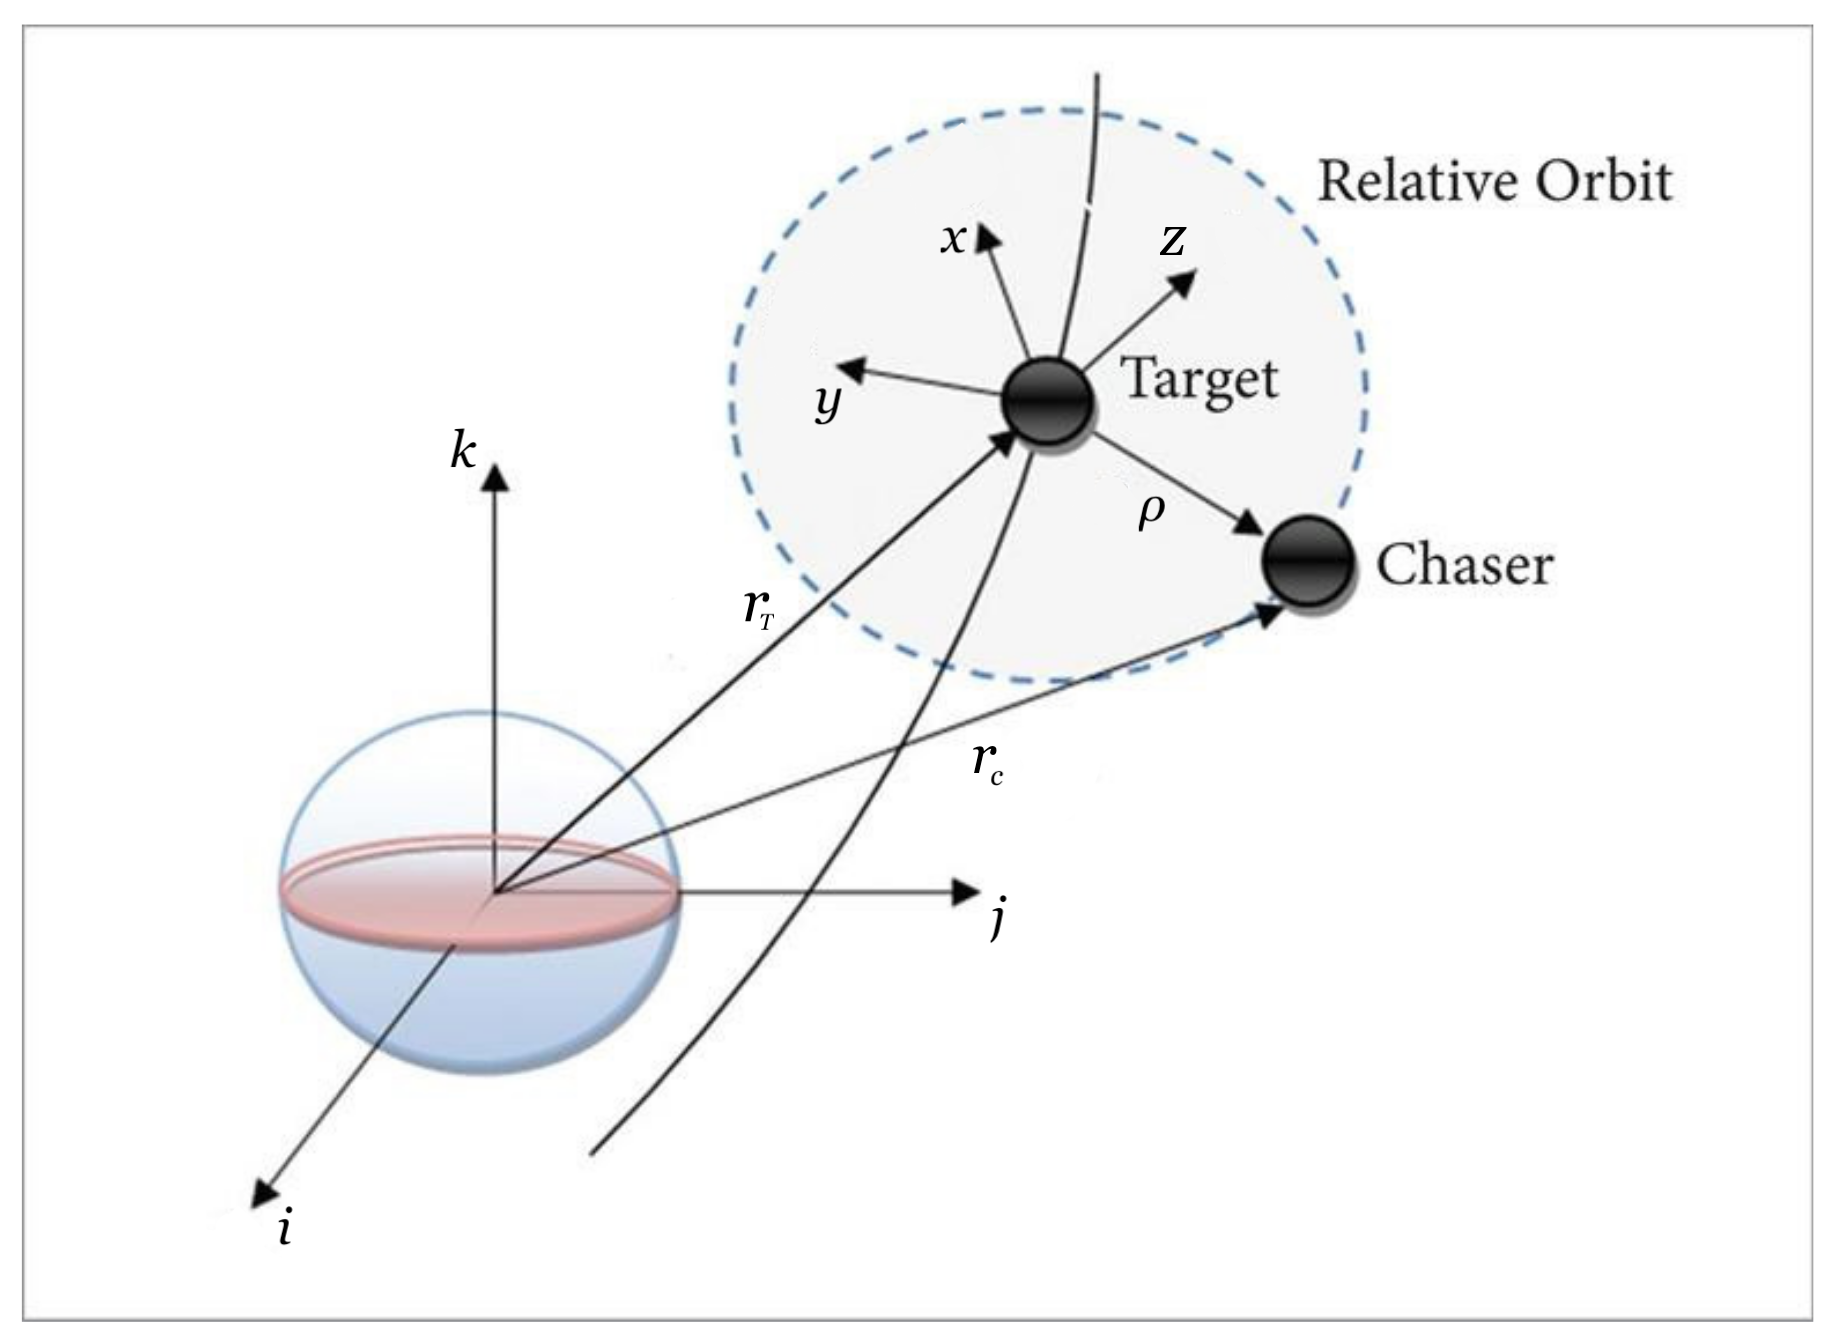

Запишем второй закон Ньютона для chaser и target 

$$ \mathbf{\ddot r_T} = - \frac{\mu{\mathbf{r_T}}}{r_T^3} \tag{1} $$

$$ \mathbf{\ddot r_с} = - \frac{\mu {\mathbf{r_с}}}{r_с^3} \tag{2}$$

$$ \mathbf{r_t} = \mathbf{r_c + \rho} \tag{3}$$

Распишем ускорение как сумму переносного, относительного и кориолисового 

$$ \mathbf{\ddot r_с = W_c^п +W_c^o + W_c^k} $$

где:

$ \mathbf{W_c^п = \omega \times \omega \times (r_T + \rho)} $ 

$ \mathbf{W_c^o = \ddot \rho} $

$ \mathbf{W_c^k = 2 \omega \times \dot \rho} $

$ \mathbf{{\omega}^T} = ( 0, n , 0)$  

$ \mathbf{{\rho}^T} = (x, y, z) $  

$ \mathbf{{r_T}^T} = (0, 0, R_T)$  

$$ \frac{r_c^2}{r_T^2} = \frac{(r_T + \rho, r_T + \rho) }{r_T^2} \approx 1 + \frac{2z}{R_T} $$

$$ r_c^{-3} = (r_c^2)^{-1,5} \approx R_T^{-3}(1 - \frac{-3z}{R_T}) \tag{4}$$

$$ \mathbf{\ddot r_c} = - \frac{\mu}{r_c^3} \mathbf{r_c} =  - \frac{\mu}{r_c^3} \cdot \mathbf{(r_T + \rho)} $$

$$ n = \sqrt{\frac{\mu}{r_T^3}} $$

Подставляя во второй закон Ньютона выражение $(4)$ для $r_c^{-3}$ и приравнивая к разложению ускорения на переносное, относительное и кориолисовое, сокращаем слагаемое  $ \frac{\mu}{r_c^3} \cdot r_T $. Таким образом, получаем систему уравнений Белецкого. 

Уравнения Белецкого (Hill-Clohessy-Wiltshire)

$$
\begin{equation}\label{eq:HCW_eq}
    \begin{cases}
        \ddot x +2n \dot z =  u_x, \\
        \ddot y + n^2 y =  u_y, \\
        \ddot z - 2n \dot x - 3n^2 z  =  u_z,
    \end{cases},
\end{equation}
$$
где $u$ - управляющие воздействия.

Эть уравнения имеют аналитическое решение:

$$
\begin{equation}\label{eq:HCW_eq_sol}
    \begin{cases}
        x (t) = -3C_1 nt + 2C_2 \cos(nt) - 2C_3 \sin(nt) + C_4,\\
        y (t) = C_5 \sin(nt) + C_6 \cos(nt),\\
        z (t) = 2C_1 + C_2 \sin(nt) + C_3 \cos(nt).
    \end{cases}
\end{equation}
$$

Подмножеством этих решений является семейство замкнутых периодических траекторий (в относительном движении)
$$
\begin{equation}\label{eq:HCW_eq_sol_modified}
    \begin{cases}
        x(t) = \widetilde C_1 \cos(nt + \alpha),\\
        y(t) = \widetilde C_2 \sin(nt + \alpha),\\
        z(t) = \dfrac{\widetilde C_1}{2} \sin(nt + \alpha),
    \end{cases}
\end{equation}
$$

Из системы уравнений Белецкого мы можем выписать явный вид матриц $\mathbf{А}$ и $\mathbf{B}$.  

$$
\begin{equation*}
A =  
\begin{pmatrix}
0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & -2n\\
0 & -n^2 & 0 & 0 & 0 & 0\\
0 & 0 & 3 n^2 & 2n & 0 & 0
\end{pmatrix},
\quad
B =  
\begin{pmatrix}
0 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0\\
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{pmatrix}
\end{equation*}
$$


### Пример решения задачи о приведении КА на одно из решений, выбранных в качестве целевой траектории

Сначала зададим параметры орбиты, а также матрицы A и B:

In [4]:
class Parameters(object):
    pass

cnst = Parameters()
cnst.mu = 3.986e14
cnst.Rer = 6371e3

orbit = Parameters
orbit.altitude = 700000
orbit.R = orbit.altitude + cnst.Rer
orbit.n = np.sqrt(cnst.mu / orbit.R**3)
orbit.T = 2 * np.pi / orbit.n

hcw = Parameters()
hcw.A = np.matrix([[0., 0., 0., 1., 0., 0.],
                   [0., 0., 0., 0., 1., 0.],
                   [0., 0., 0., 0., 0., 1.],
                   [0., 0., 0., 0., 0., -2. * orbit.n],
                   [0., -orbit.n**2, 0., 0., 0., 0.],
                   [0., 0., 3. * orbit.n**2, 2.*orbit.n, 0., 0.]])
hcw.B = np.concatenate((np.zeros((3, 3)), np.eye(3)), 0)

lqr = Parameters()
lqr.Q = np.eye(6) * 1e-12
lqr.R = np.eye(3)
lqr.K, P, E = lqr_fun(hcw.A, hcw.B, lqr.Q, lqr.R)

Определим целевую траекторию движения КА-chaser по известным уравнениям:

In [5]:
C1 = 1000
C2 = 1000

def ref_traj(t):
    x_r = C1 * np.cos(orbit.n * t)
    y_r = C2 * np.sin(orbit.n * t)
    z_r = 0.5 * C1 * np.sin(orbit.n * t)
    vx_r = - orbit.n * C1 * np.sin(orbit.n * t)
    vy_r = orbit.n * C2 * np.cos(orbit.n * t)
    vz_r = 0.5 * orbit.n * C1 * np.cos(orbit.n * t)
    return np.array([x_r, y_r, z_r, vx_r, vy_r, vz_r])

def rhs(t, x):   
    x_err = x - ref_traj(t)
    return np.array((hcw.A.dot(x) + (hcw.B.dot(lqr.K)).dot(x_err)))[0]

In [6]:
x0 = [500., 500., 0., 0., 0., 0.]
#x0 = ref_traj(0)
t_sol = np.arange(0, orbit.T, 1)

sol = solve_ivp(rhs, (0, orbit.T), x0, t_eval = t_sol)

Построим эти траектории. Синяя - текущая траектория КА, красная - целевая:

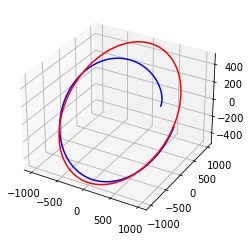

In [7]:
x_sol = sol.y
x_ref = ref_traj(t_sol)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_sol[0, :], x_sol[1, :], x_sol[2, :], 'b', label='parametric curve')
ax.plot(x_ref[0, :], x_ref[1, :], x_ref[2, :], 'r', label='parametric curve')


## Возможные задачи:

1. Обращенный маятник на тележке (sympy + LQR)
https://www.sciencedirect.com/science/article/pii/S1877705813016020

2. Квадрокоптер
https://arxiv.org/ftp/arxiv/papers/2009/2009.13175.pdf

3. Полёт группы спутников на орбите (перестройка простых конфигураций на 6-7 КА)
https://www.mdpi.com/2226-4310/9/8/419

4. LQR Design for Spacecraft Control System Based on Quaternion Model
https://doi.org/10.1061/(ASCE)AS.1943-5525.0000142